In [1]:
import itertools
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

sns.set(palette='muted')
style.use('ggplot')

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
# Add the number of words in each ad topic line.

def word_count(string):
    return string.count(" ") + 1

df['Line_Words'] = df['Ad Topic Line'].apply(lambda row: word_count(row))

In [4]:
# Add the length of each ad topic line.

def line_length(string):
    return len(string)

df['Line_Length'] = df['Ad Topic Line'].apply(lambda row: line_length(row))

In [5]:
# Change the Male category to 'Male' and 'Female'

def gender_label_encode(label):
    if label == 0:
        return 'Female'
    else: 
        return 'Male'
    
df['Gender Labeled'] = df['Male'].apply(lambda row: gender_label_encode(row))

In [6]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Line_Words,Line_Length,Gender Labeled
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,3,34,Female
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,3,34,Male
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,3,32,Female
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,3,37,Male
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,29,Female


In [7]:
y = df.loc[:, 'Clicked on Ad']

In [8]:
df.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
Line_Words                     4
Line_Length                   35
Gender Labeled                 2
dtype: int64

In [9]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)

nums.remove('Male') # Male fits better as a categorical variable.
nums.remove('Clicked on Ad') # This is the label.
nums.remove('Line_Words') # This is the label.
nums.remove('Line_Length') # This is the label.
nums.remove('Age')

cats.remove('Ad Topic Line') # This doesn't really give insights in terms of data science or data visualization.
cats.remove('Timestamp') # This is a unique value so this wouldn't give any insights either.
cats.remove('City') # This has a unique value for almost every row, so it won't give any new information.
cats.extend(['Line_Words', 'Line_Length', 'Age'])

In [10]:
print(f'cats: {cats}')
print(f'nums: {nums}')

cats: ['Country', 'Gender Labeled', 'Line_Words', 'Line_Length', 'Age']
nums: ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']


In [11]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
Line_Words                  0
Line_Length                 0
Gender Labeled              0
dtype: int64

In [12]:
time_df = pd.concat((df['Timestamp'], df['Clicked on Ad']), axis=1) # I will use this later to try to find insights in relation to time.
df = pd.concat((df[cats], df[nums], df['Clicked on Ad']), axis=1)

In [13]:
df.head()

,Country,Gender Labeled,Line_Words,Line_Length,Age,Daily Time Spent on Site,Area Income,Daily Internet Usage,Clicked on Ad
0,Tunisia,Female,3,34,35,68.95,61833.90,256.09,0
1,Nauru,Male,3,34,31,80.23,68441.85,193.77,0
2,San Marino,Female,3,32,26,69.47,59785.94,236.50,0
3,Italy,Male,3,37,29,74.15,54806.18,245.89,0
4,Iceland,Female,3,29,35,68.37,73889.99,225.58,0


In [14]:
fontsize = 15

In [15]:
df_cats = df.loc[:, 'Country': 'Line_Length']
df_nums = df.loc[:, 'Daily Time Spent on Site': 'Daily Internet Usage']

# Categorical Analysis

In [16]:
df_cats.describe()

,Line_Words,Line_Length
count,1000.000000,1000.000000
mean,3.219000,33.394000
std,0.485051,5.741928
min,3.000000,17.000000
25%,3.000000,29.000000
50%,3.000000,33.000000
75%,3.000000,37.000000
max,6.000000,55.000000


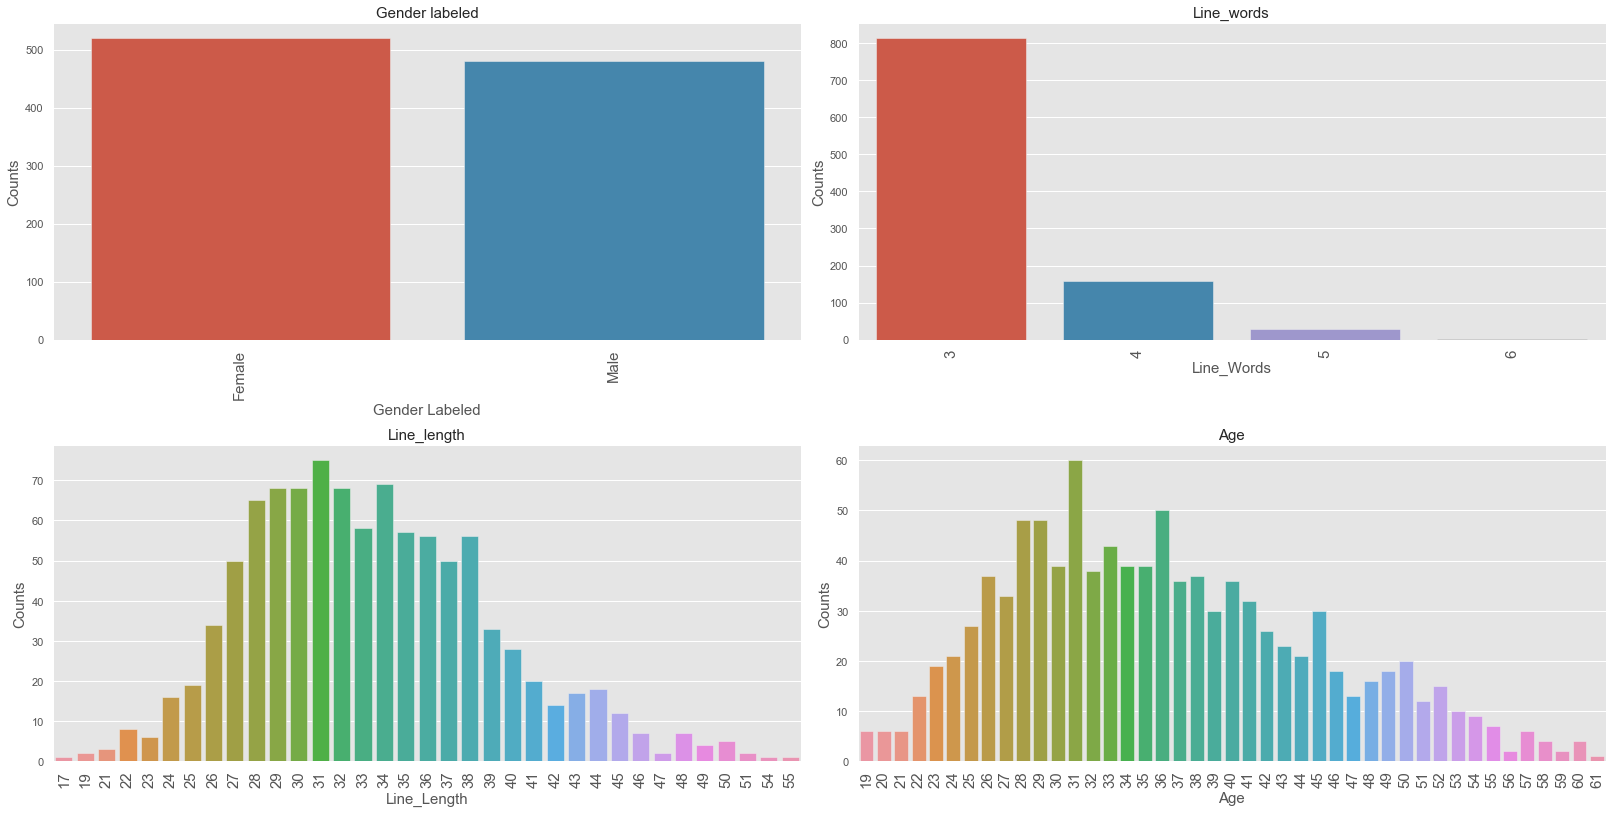

In [17]:
cats.remove('Country')

fig1 = plt.figure(1, figsize=(22.5, 22.5))
i = 0

for cat in cats:
    i += 1
    ax = plt.subplot(4, 2, i)
    
    sns.countplot(df[cat])
    
    ax.set_title(cat.capitalize(), fontsize=fontsize)
    plt.xticks(rotation=90, fontsize=fontsize)
    ax.set_ylabel('Counts', fontsize=fontsize)
    ax.set_xlabel(cat, fontsize=fontsize)
    plt.tight_layout()

<h3>Insights</h3>
<p>
    Amongst these 4 countplots, we see that the only category that is uniformly distributed is the gender distribution. If we look at the 'Line_Words', most of the ad topic lines are 3 words, maybe 4. There really aren't many longer than that so that shows that the majority of ads in this dataset, and perhaps representative of many ads, have shorter catch lines since that may possibly lead to more success. We see with 'Line_Length' that most of the ad topic lines are short but not too short. Most of them range between the 28 - 38 character length range. Lastly, 'Age' just shows us that in this particular dataset, a lot of the targeted audiences are between 30-40 years old, perhaps an important note to remember throughout our analysis.
</p>

In [18]:
combinations = itertools.combinations(['Line_Words', 'Gender Labeled', 'Age'], 2)
combos = [combo for combo in combinations]

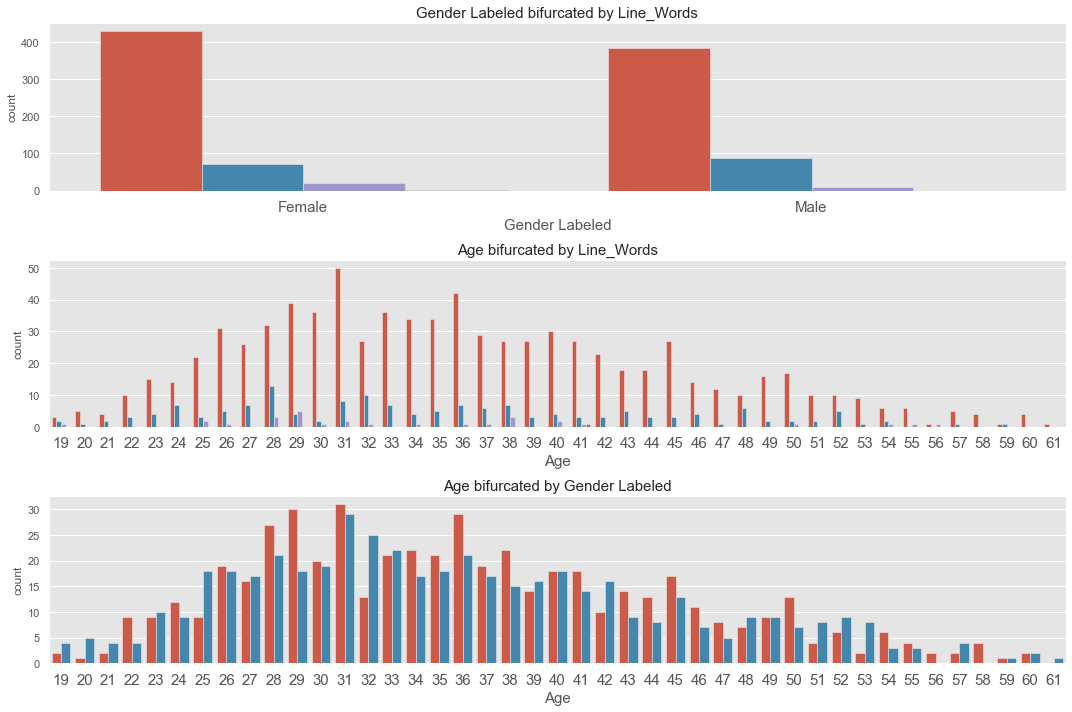

In [19]:
fig2 = plt.figure(1, figsize=(15, 10))
i = 0

for pair in combos:
    i += 1
    ax = plt.subplot(3, 1, i)
    
    sns.countplot(x=df[pair[1]], hue=df[pair[0]])
    ax.set_title(f'{pair[1]} bifurcated by {pair[0]}', fontsize=fontsize)
    ax.set_xlabel(pair[1], fontsize=fontsize)

    plt.xticks(fontsize=fontsize)
    ax.get_legend().remove()
    plt.tight_layout()

<h3>Insights</h3>
<p>
    These couple graphs shows that categorical categories bifurcating each other. We see first that no matter the gender, the ad topic lines are mostly shorter, 3-4 words long, since like we saw in our countplots, is most likely because these lead to more success, which can analyze later on. The second graph is interesting because looking at the x-axis, we see that there are a variety of ages but no matter what, like we've been seeing, 3 words per ad topic line is the most common and this could be because there is a psychological behavior associated with the shorter 3 words than some of the longest phrases. In the last graph, we see 'Age' is bifurcated by 'Gender Labeled' and we see that for certain ages, men are more advertised to and in other cases women are but that may be due to the dataset being just 1000 data points. Even for a 1000 datapoints, we see that lot of times, men and women both are equally advertised to for different ages.
</p>

# Numerical Analysis

In [20]:
df_nums.describe()

,Daily Time Spent on Site,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000
mean,65.000200,55000.000080,180.000100
std,15.853615,13414.634022,43.902339
min,32.600000,13996.500000,104.780000
25%,51.360000,47031.802500,138.830000
50%,68.215000,57012.300000,183.130000
75%,78.547500,65470.635000,218.792500
max,91.430000,79484.800000,269.960000


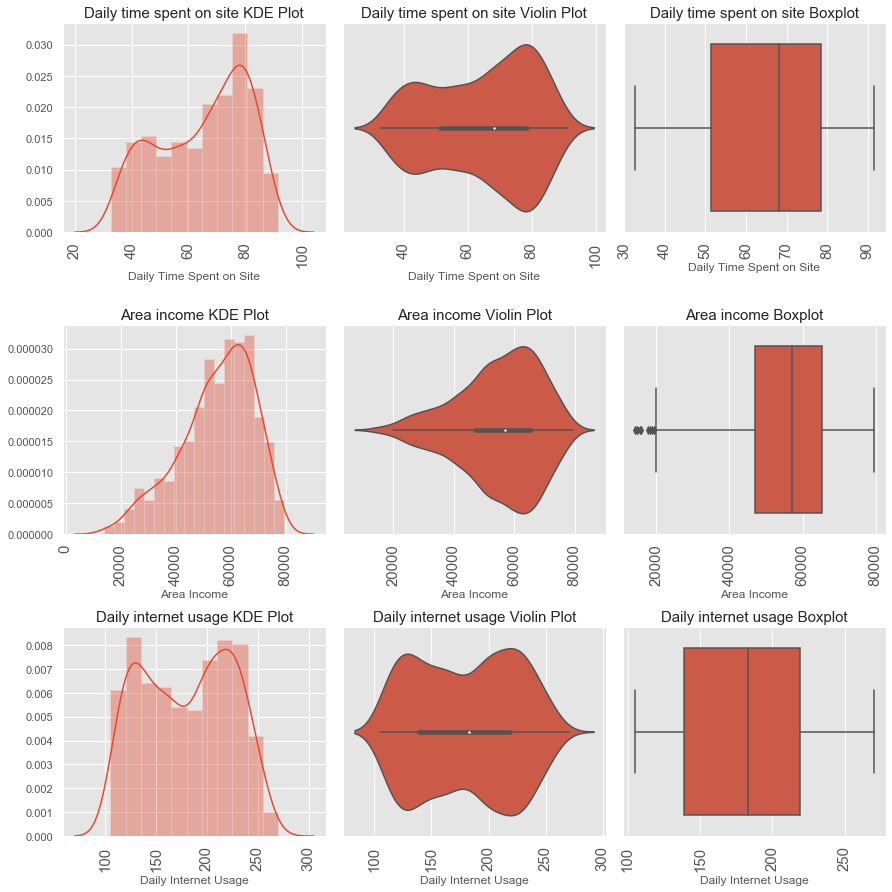

In [21]:
fig4 = plt.figure(1, figsize=(12.5, 12.5))
i = 0

for num in nums:
    i += 1
    ax = plt.subplot(len(nums), 3, i)
    sns.distplot(df[num])
    ax.set_title(f'{num.capitalize()} KDE Plot', fontsize=fontsize)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.tight_layout()
    
    i += 1
    ax2 = plt.subplot(len(nums), 3, i)
    sns.violinplot(df[num], hue=df['Clicked on Ad'])
    ax2.set_title(f'{num.capitalize()} Violin Plot', fontsize=fontsize)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.tight_layout()
    
    i += 1
    ax3 = plt.subplot(len(nums), 3, i)
    sns.boxplot(df[num], hue=df['Clicked on Ad'])
    ax3.set_title(f'{num.capitalize()} Boxplot', fontsize=fontsize)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.tight_layout()

<h3>Insights</h3>

<h5>Daily Time Spent</h5>
<p>
    Daily time spent doesn't really have a guassian spread with more people spending a bit more time on the site and less time. It almost looks like it is bi-modal with one high at around 42.5 minutes and another high just under 80 minutes. Looking at the boxplot, the points are most concentrated between 68 to 79 minutes. 
</p>

<h5>Area Income</h5>
<p>
    Area income is a lot more guassian but this time with a left skew but we see more of a Normal distribution. It seems that people with more income are more likely to be advertised. We see there are a few outliers on the lower end of the income range but for the most part, most of the people are between the 48000 - 65000 income range and another 25% between 65000 - 80000, which further shows people with more income are more likely to be advertised to.
</p>

<h5>Daily Internet Usage</h5>
<p>
    We clearly see Daily Internet Usage is bi-modal with one high being at around 120 minutes and the next high being around 225 minutes. We see the people who are advertised to are evenly spread throughout 100-275 minutes per day, at least evenly spread between the 4 even ranges in that spread. Maybe, we can try to analyze why there are two highs in the bi-modal spread. 
</p>

<Figure size 720x720 with 0 Axes>

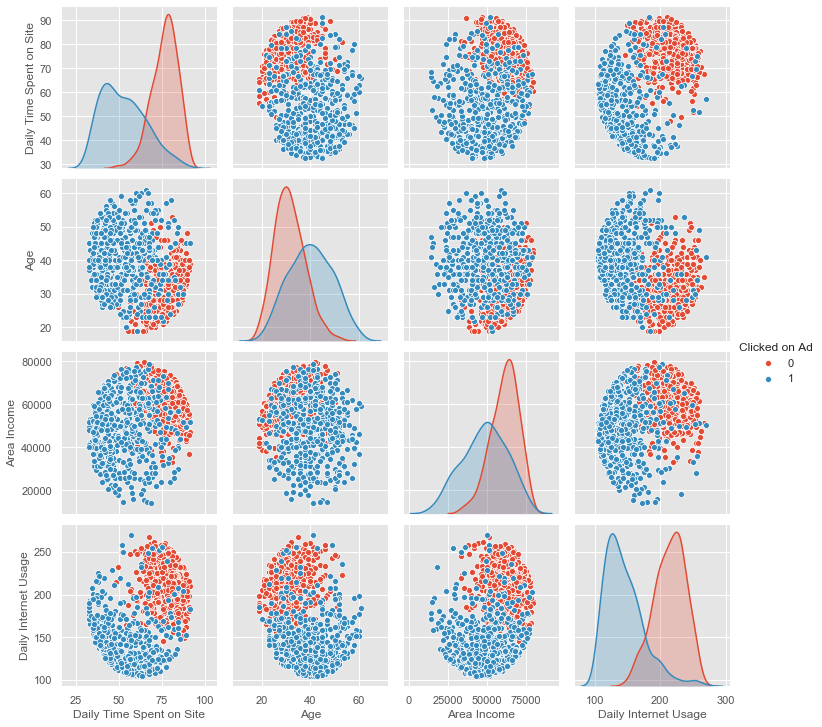

In [22]:
plt.figure(figsize=(10, 10))
sns.pairplot(df, hue ='Clicked on Ad', vars=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'], diag_kind='kde')
plt.show()

<h4>Insights</h4>
<p>
    These scatterplots simply show that there doesn't seem to be much of a correlation between any of the numerical attributes, not even daily time spent on the internet vs daily time spent on the site, which one would expect more of a correlation between.
</p>

In [23]:
df_nums.corr()

,Daily Time Spent on Site,Area Income,Daily Internet Usage
Daily Time Spent on Site,1.000000,0.310954,0.518658
Area Income,0.310954,1.000000,0.337496
Daily Internet Usage,0.518658,0.337496,1.000000


### Numericals Hued by Categoricals

In [24]:
nums

['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']

In [25]:
combinations = itertools.combinations(nums, 2)
combos = [combo for combo in combinations]

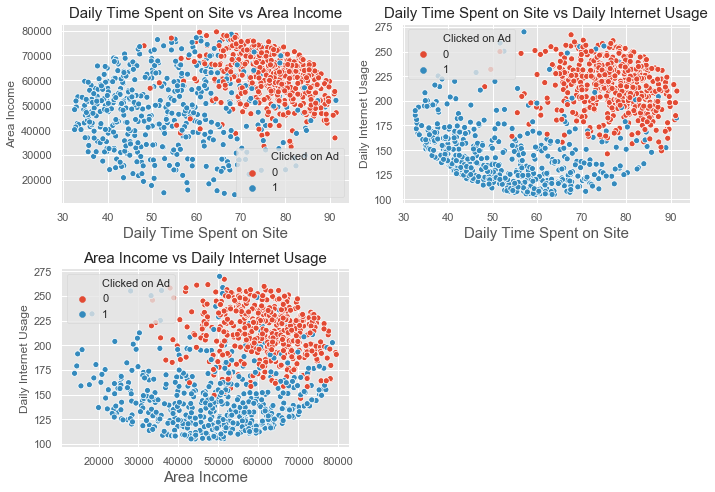

In [26]:
fig5 = plt.figure(1, figsize=(10, 20))
i = 0

for combo in combos:
    i += 1
    ax = plt.subplot(6, 2, i)
    sns.scatterplot(df[combo[0]], df[combo[1]], hue=df['Clicked on Ad'])
    ax.set_title(f'{combo[0]} vs {combo[1]}', fontsize=fontsize)
    ax.set_xlabel(combo[0], fontsize=fontsize)
    plt.tight_layout()

<h3>Insights</h3>

<h5>Daily Time on Site vs Area Income</h5>
<p>
    Ironically, we see that the 1's, people who clicked on the ad, are most frequent on the lower spectrum of daily time spent on the site as opposed to the 0's, who did not click on the ad, where we see the it is more frequent to see the 0's towards the right end of the range, meaning towards the longer end of people spending time on the website. We see that area income doesn't really have any correlation with whether one clicks on the ad because we see that whether it's a blue or red dot, it is dispersed vertically through the different area income ranges. We can see a slightly pattern where the red dots are closer to the higher range.
</p>

<h5>Daily Time on Site vs Daily Internet Usage</h5>
<p>
    We see once again that people who spent less time on the website tend to click on the ad more as opposed to those who spend more time on the site. If we look at the vertical distribution, we see once again that people who spent more on time on the internet are less likely to click the ad as opposed to those who are lower on the vertical spectrum, meaning those who spend less time on the internet. 
</p>

<h5>Area Income vs Daily Internet Usage</h5>
<p>
    This last graph confirms some of the paatterns we saw earlier. We see that vertically, those who spend less time on the internet tend to click on the ad more. Horizontally, we see that people of all area incomes clicked on the ad, but people who do not click the ad are in the upper range of area income with most of them being over 50000. 
</p>

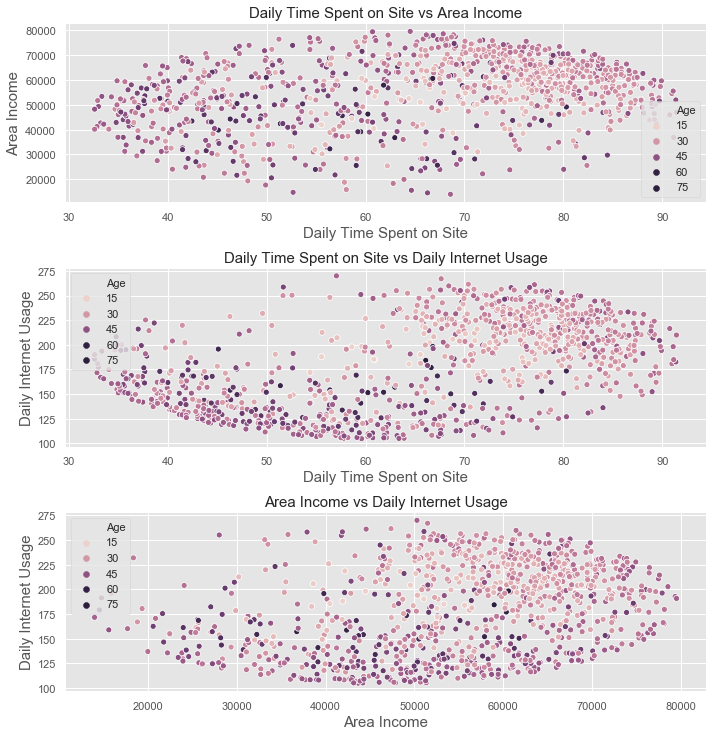

In [27]:
fig9 = plt.figure(1, figsize=(10, 20))
i = 0

for combo in combos:
    i += 1
    ax = plt.subplot(6, 1, i)
    sns.scatterplot(df[combo[0]], df[combo[1]], hue=df['Age'])
    ax.set_title(f'{combo[0]} vs {combo[1]}', fontsize=fontsize)
    ax.set_xlabel(combo[0], fontsize=fontsize)
    ax.set_ylabel(combo[1], fontsize=fontsize)
    plt.tight_layout()


<h3>Insights</h3>

<h5>Daily Time on Site vs Area Income</h5>
<p>
    In this first graph, we see that a lot of the younger populations in the dataset spend more time on the site than the older generation. This makes sense since a lot of the younger generation is more acquainted with the new technologies as opposed to the younger generation. We do see that people of all ages are dispersed throughout the area incomes, although the younger population is squeezed a little more to the higher area incomes.
</p>

<h5>Daily Time on Site vs Daily Internet Usage</h5>
<p>
    Much like the first graph, we see once again that the younger generation spends more time ont the internet, whether it's general usage or on the site, since they are more acquainted with the new technology coming out and since they grew up with this new technology. 
</p>

<h5>Area Income vs Daily Internet Usage</h5>
<p>
    It seems in this last graph that amongst the higher income range, in this dataset, more of the younger population is advertised to as opposed to the older population. However, we see the older generation, at least in this dataset, is dispersed through the different area income ranges.
</p>

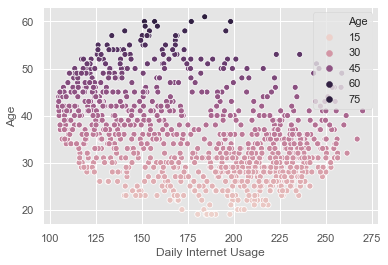

In [69]:
sns.scatterplot(df['Daily Internet Usage'], df['Age'], hue=df['Age'])

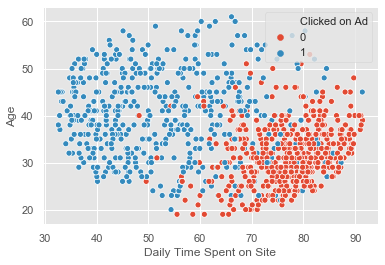

In [65]:
sns.scatterplot(df['Daily Time Spent on Site'], df['Age'], hue=df['Clicked on Ad'])

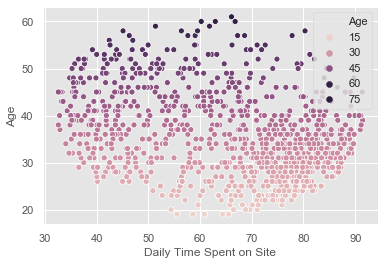

In [68]:
sns.scatterplot(df['Daily Time Spent on Site'], df['Age'], hue=df['Age'])

<h3>Insights</h3>

<p>
    In these three graphs, we look at how the 'Daily Internet Usage' is related to 'Age' hued by both 'Age' and 'Clicked on Ad' and how 'Daily Time Spent on Site' relates to 'Age'. We see in the first graph that the younger population is spread out through the various internet usages but the older population is on the lower end of the internet usage spectrum. This makes sense since the younger population is more versed with the new technologies. We also see in the second graph that a lot of the blue dots, which represent those who clicked on the ad are on the left end of the internet usage spectrum, which shows that perhaps the elder population are more of the people who click on this ad and that maybe this product appeals more to the elder population. In the third graph, we also see no matter the age, various people of all ages spent time on the site, which shows that maybe this product, once again, more appealing to the elder population because they tend to still click on the ad more than the younger population. 
</p>

# Label Visualization and Analysis

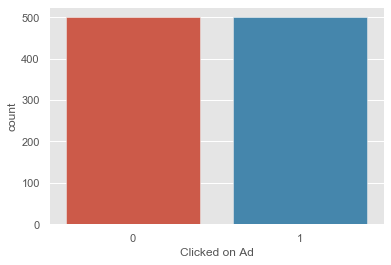

In [28]:
sns.countplot(df['Clicked on Ad'])

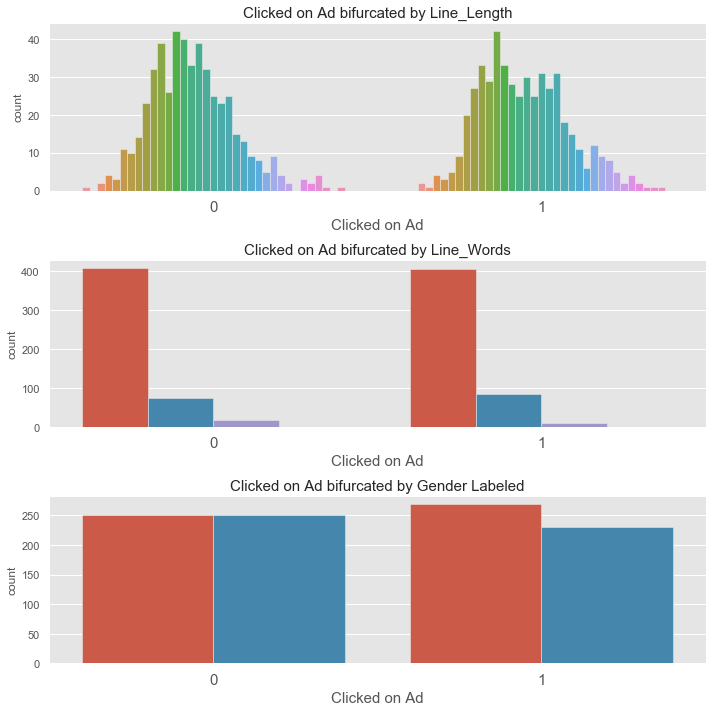

In [29]:
hues = ['Line_Length', 'Line_Words', 'Gender Labeled']
fig10 = plt.figure(1, figsize=(10, 10))
i = 0

for hue in hues:
    i += 1
    ax = plt.subplot(3, 1, i)
    
    sns.countplot(x=df['Clicked on Ad'], hue=df[hue])
    ax.set_title(f'Clicked on Ad bifurcated by {hue}', fontsize=fontsize)
    ax.set_xlabel('Clicked on Ad', fontsize=fontsize)

    plt.xticks(fontsize=fontsize)
    ax.get_legend().remove()
    plt.tight_layout()

<h3>Insights</h3>
<p>
    The biggest thing we see is that no matter what is bifurcating 'Clicked on Ad', the distributions are similar between whether one clicks on the ad or not. It should be noted this is part of the 'consumer analysis' part of the ads process, meaning choosing what tag line to choose, the length of it, and advertising to both men and women so the distribution doesn't change much because these are the basics that are advertised to everyone whether they click on the ad or not. It is interesting though that the number of words of the tagline doesn't affect as much the probability of the person clicking the ad, which is something I thought would differ between the two.
</p>

In [30]:
cats

['Gender Labeled', 'Line_Words', 'Line_Length', 'Age']

## Categorical Features Bifurcated by Label

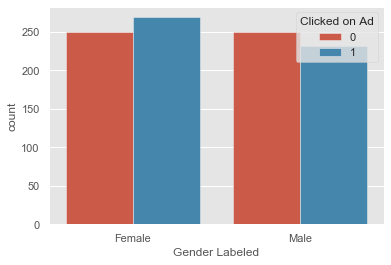

In [31]:
sns.countplot(df['Gender Labeled'], hue=df['Clicked on Ad'])

<h3>Insights</h3>
<p>
    It seems by this distribution that females are slightly more likely to click on this ad as opposed to males.
</p>

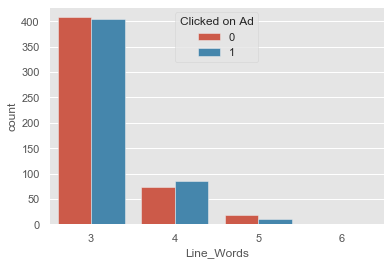

In [32]:
sns.countplot(df['Line_Words'], hue=df['Clicked on Ad'])

<h3>Insights</h3>

<p>
    In this first graph, we see that the number of words in an ad topic line doesn't really impact whether one clicks on an ad or not which is something I didn't really expect as much. 
</p>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

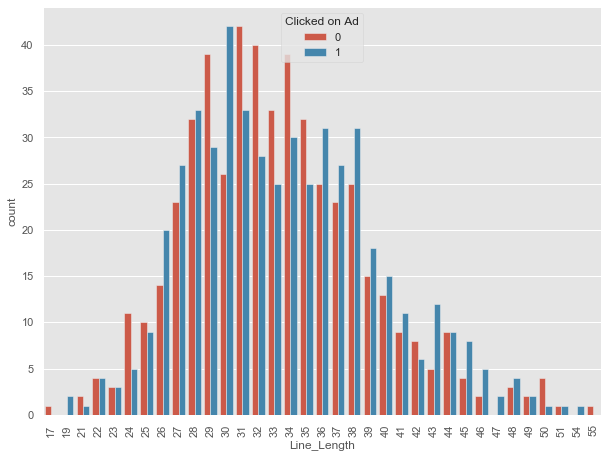

In [33]:
fig = plt.figure(figsize=(10, 7.5))
ax = plt.subplot(1,1,1)
sns.countplot(df['Line_Length'], hue=df['Clicked on Ad'])
plt.xticks(rotation=90)

<h3>Insights</h3>

<p>
    In this first graph, we see that after a length of about 35 characters, we start to see that those ads and ad topic lines are more likely to be clicked on. This is possibly because those ad topic lines are more descriptive than the lines with less characters so they probably see more success than the others.
</p>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

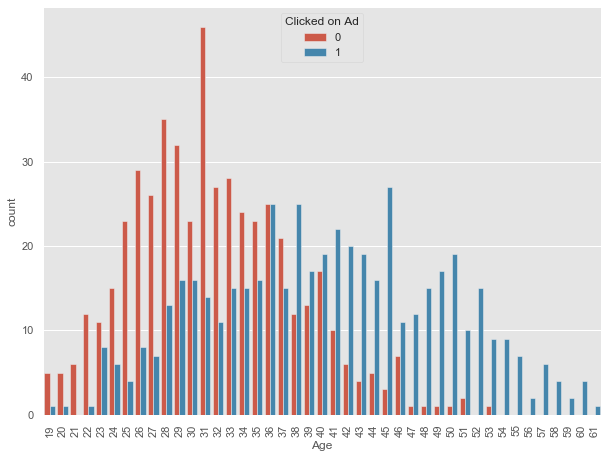

In [34]:
fig = plt.figure(figsize=(10, 7.5))
ax = plt.subplot(1,1,1)
sns.countplot(df['Age'], hue=df['Clicked on Ad'])
plt.xticks(rotation=90)

<h3>Insights</h3>
<p>
    We see that the older generation is a lot more likely to click on the ad for this site as opposed to the younger generation so, once again, we see that maybe this is a product that caters more to the elder population.
</p>

# Time Analysis

In [35]:
def convert_datetime(time):
    return datetime.strptime(time, '%Y-%m-%d %H:%M:%S')

In [36]:
def extract_month(time): # There are only 7 months in this dataset.
    return time.strftime('%B')

In [37]:
def extract_am_pm(time):
    return time.strftime('%p')

In [38]:
def extract_hour(time):
    return time.strftime('%H')

In [39]:
def day_time(hour):
    hour = int(hour)
    
    if hour > 5 and hour <= 12:
        return 'morning'
    elif hour > 12 and hour <= 16:
        return 'afternoon'
    elif hour > 16 and hour <= 18:
        return 'evening'
    else:
        return 'night'

In [40]:
time_df['Datetime'] = time_df['Timestamp'].apply(lambda row: convert_datetime(row))
time_df['Month'] = time_df['Datetime'].apply(lambda row: extract_month(row))
time_df['AM/PM'] = time_df['Datetime'].apply(lambda row: extract_am_pm(row))
time_df['Hour'] = time_df['Datetime'].apply(lambda row: extract_hour(row))
time_df['Day Time'] = time_df['Hour'].apply(lambda row: day_time(row))

In [41]:
time_df.head()

,Timestamp,Clicked on Ad,Datetime,Month,AM/PM,Hour,Day Time
0,2016-03-27 00:53:11,0,2016-03-27 00:53:11,March,AM,00,night
1,2016-04-04 01:39:02,0,2016-04-04 01:39:02,April,AM,01,night
2,2016-03-13 20:35:42,0,2016-03-13 20:35:42,March,PM,20,night
3,2016-01-10 02:31:19,0,2016-01-10 02:31:19,January,AM,02,night
4,2016-06-03 03:36:18,0,2016-06-03 03:36:18,June,AM,03,night


In [42]:
time_cols = ['Month', 'AM/PM', 'Hour', 'Day Time']

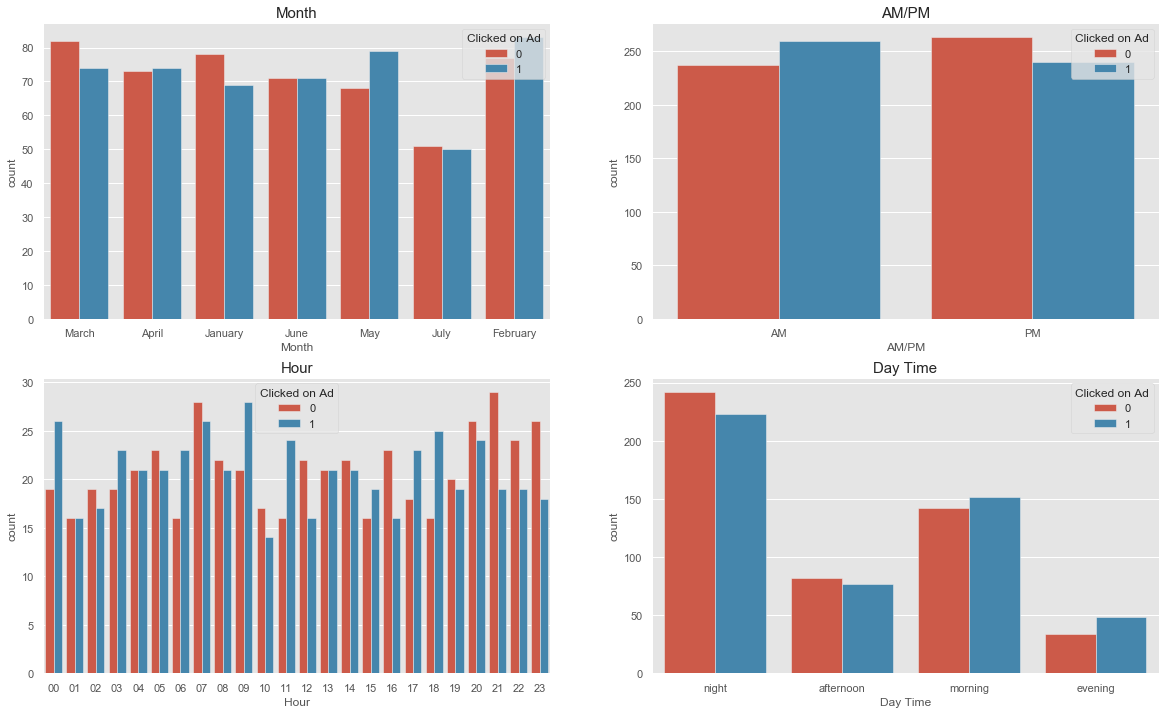

In [43]:
time_fig = plt.figure(figsize=(20, 25))
i = 0

for col in time_cols:
    i += 1
    ax = plt.subplot(4, 2, i)
    sns.countplot(time_df[col], hue=df['Clicked on Ad'])
    ax.set_title(f'{col}', fontsize=fontsize)

<h3>Insights</h3>
<p>
    Looking at these graphs, we can't really see a discernable pattern amongst any of the graphs, whether the ad is clicked or not. We do see a few time where the red bars(didn't click on the ad) are higher than the blue bars(clicked on the ad) in the 'Month', 'Hour', and even 'Day Time' graphs and vice versa but there are too few data points to make a conclusive claim about that. One small pattern we do see is that in the AM/PM countplots, the ad is more likely to be clicked on in the AM time rather than the PM time but the difference isn't significant enough for us to make a claim.
</p>

## Internet Time Usage Analysis

In [45]:
 df['Site/Internet Ratio'] = df['Daily Time Spent on Site'] / df['Daily Internet Usage']

In [46]:
df.head()

,Country,Gender Labeled,Line_Words,Line_Length,Age,Daily Time Spent on Site,Area Income,Daily Internet Usage,Clicked on Ad,Site/Internet Ratio
0,Tunisia,Female,3,34,35,68.95,61833.90,256.09,0,0.269241
1,Nauru,Male,3,34,31,80.23,68441.85,193.77,0,0.414048
2,San Marino,Female,3,32,26,69.47,59785.94,236.50,0,0.293742
3,Italy,Male,3,37,29,74.15,54806.18,245.89,0,0.301558
4,Iceland,Female,3,29,35,68.37,73889.99,225.58,0,0.303085


In [53]:
def ratio_conversion(ratio):
    if ratio <= 0.20:
        return 'Less'
    elif ratio > 0.20 and ratio < 0.30:
        return 'Mid'
    elif ratio >= 0.30 and ratio < 0.40:
        return 'High'
    else:
        return 'Extreme'

df['Ratio Label'] = df['Site/Internet Ratio'].apply(lambda row: ratio_conversion(row))

In [54]:
df.head()

,Country,Gender Labeled,Line_Words,Line_Length,Age,Daily Time Spent on Site,Area Income,Daily Internet Usage,Clicked on Ad,Site/Internet Ratio,Ratio Label
0,Tunisia,Female,3,34,35,68.95,61833.90,256.09,0,0.269241,Mid
1,Nauru,Male,3,34,31,80.23,68441.85,193.77,0,0.414048,Extreme
2,San Marino,Female,3,32,26,69.47,59785.94,236.50,0,0.293742,Mid
3,Italy,Male,3,37,29,74.15,54806.18,245.89,0,0.301558,High
4,Iceland,Female,3,29,35,68.37,73889.99,225.58,0,0.303085,High


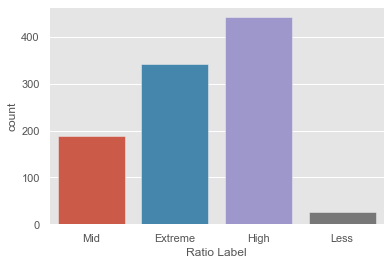

In [55]:
sns.countplot(df['Ratio Label'])

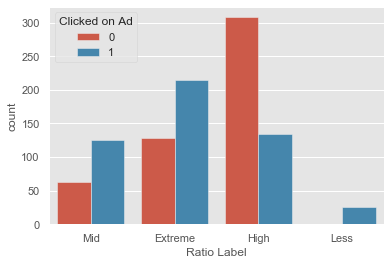

In [56]:
sns.countplot(df['Ratio Label'], hue=df['Clicked on Ad'])

<h3>Insights</h3>
<p>
    We see that people who spend a middle or extreme amounts of time on the website when they are on the internet tend to click on the ad more often and of the few who spend a little less time, they also click on the ad. It is interesting to see though people in the 'High' category are more likely to not click on the ad than are when in the 'Extreme' category, it is the opposite.
</p>